In [ ]:
"""
<주성분분석(PCA : Principal Component Analysiss)>
 - 대표적인 차원 축소 모델
 - 비지도학습 전처리 작업 중 하나
 - 특성이 많으면 훈련 모델의 성능은 높아지지만,
   과대적합 될 가능성이 높아짐, 이런 현상을 해소할 때 사용
   
<차원축소의 개념>
 - 데이터를 가장 잘 나타내는 일부 특성을 선택하여
 - 데이터 크기를 줄이면서, 학습 모델의 성능을 향상시키는 방법
 - 축소된 차원을 다시 원본 차원으로 손실을 최소화하면서 복원도 가능함
 
<장점>
 - 대량의 데이터를 이용하여 모델 훈련 시 
   시간이 오래 걸리는 경우에 적용하면 좋음
 - 훈련 시간 개선에 좋음
"""

# PCA 주성분분석 

In [1]:
### 데이터 읽어 들이기..
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fruits = np.load("./data/09_fruits_300.npy")

print(len(fruits))
fruits

fruits_2d = fruits.reshape(-1, 100 * 100)
fruits_2d.shape

300


(300, 10000)

In [3]:
### 데이터프레임으로 생성해보기
import pandas as pd
df = pd.DataFrame(fruits_2d)
df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,1,1,1,1,1,1,1,3,...,1,1,1,1,1,1,1,1,1,1
296,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
297,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
298,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
### 라이브러리
from sklearn.decomposition import PCA

In [6]:
### 클래스 모델 생성하기
# - n_components : 축소하고자 하는 주성분의 갯수를 지정해 주어야 함
pca = PCA(n_components=50)
pca

PCA(n_components=50)

In [7]:
### 훈련시키기
# - 2차원 데이터 사용
pca.fit(fruits_2d)

PCA(n_components=50)

In [8]:
pca.components_.shapepe

(50, 10000)

In [9]:
def draw_fruits(arr, ratio=1) :
    ### 전체 이미지 갯수 계산
    n = len(arr)
    
    ### 한 행에 10개씩 이미지 그리기 위한 계산
    rows = int(np.ceil(n/10))
    
    ### 행이 1개 이면 열 개수는 샘플 개수이므로,
    # - 그렇지 않으면 10개로 정의
    cols = n if rows < 2 else 10
    
    ### squeeze : 2차원 형태로 axs를 반환할 수 있도록 
    # - False로 지정
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio),
                            squeeze=False)
    for i in range(rows) :
        for j in range(cols) :
            ### n개 까지만 그리기
            if i*10+j < n : 
                axs[i, j].imshow(arr[i*10+j], cmap="gray_r")
                
            ### 좌표축 표시하지 않기
            axs[i, j].axis("off")
    plt.show()

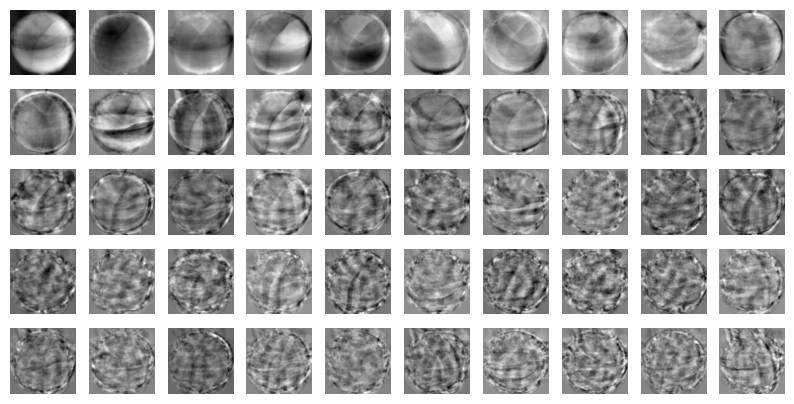

In [10]:
### 찾은 50개의 주성분 특성데이터를 이용해서 시각화하기
# 시각화를 위해 3차원으로 변환하기
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [11]:
### 차원축소는 특성의 갯수를 줄이는 것으로
# - 컬럼(특성)의 갯수를 50개로 줄이기
# - transform : 원본의 행의 갯수를 기준으로
#               훈련모델이 축소한 50의 행의 특성을 가장 잘 해석할 수있는
#               50개의 특성(컬럼)을 추출합니다.
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

### 원본으로 재구성하기

In [12]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

In [13]:
### 재구성한 데이터를 시각화하기 위해 3차원으로 만들기
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
fruits_reconstruct.shape

(300, 100, 100)

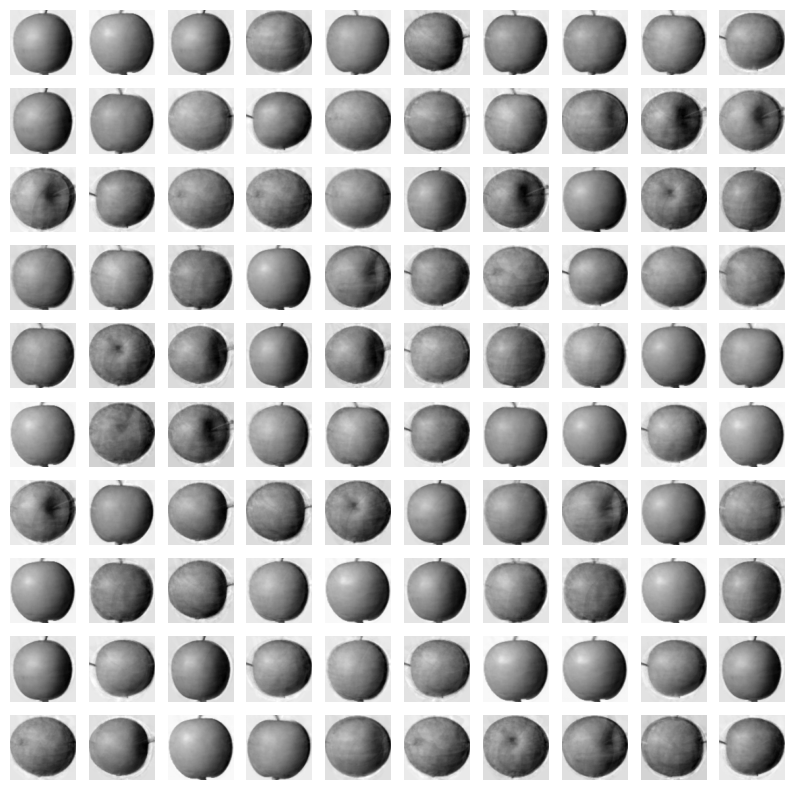

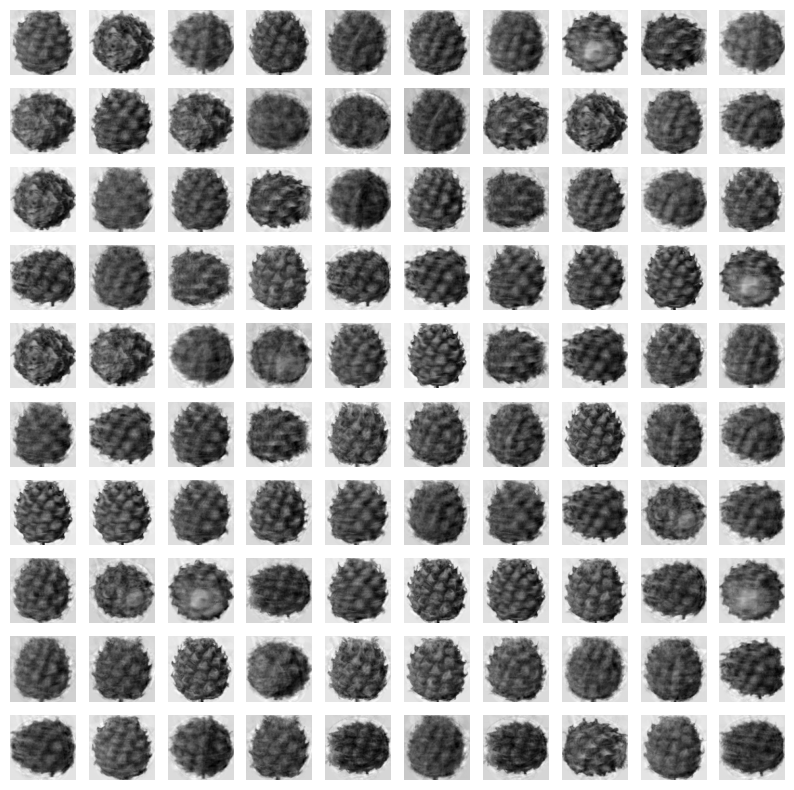

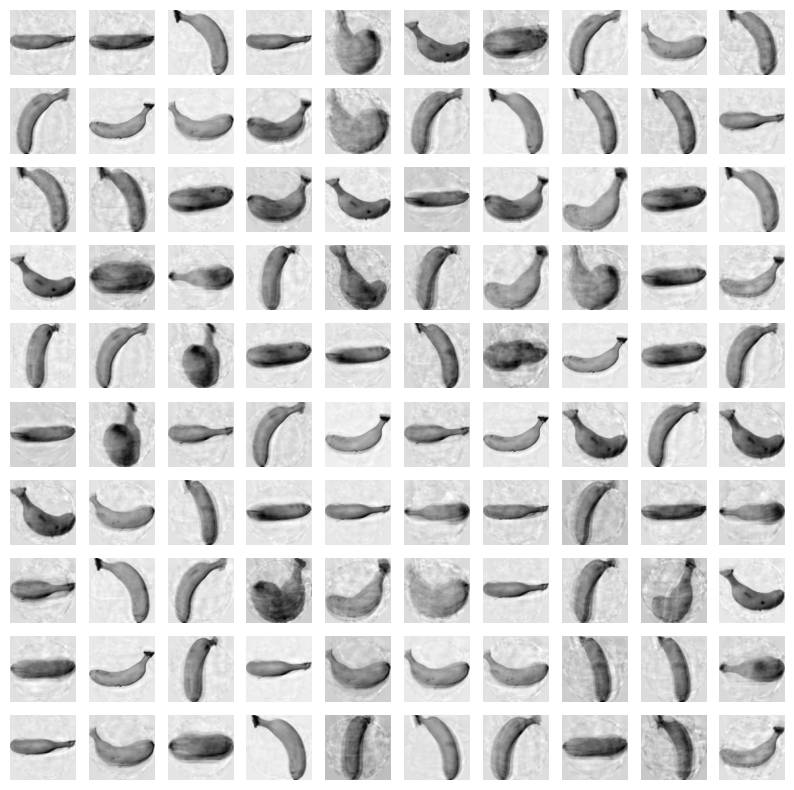

In [14]:
for start in [0, 100, 200] :
    draw_fruits(fruits_reconstruct[start : start+100])
    print("\n")

In [16]:
fruits_2d.shape, fruits_pca.shape

((300, 10000), (300, 50))

### 모델에 적용하기

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
### 클래스(모델) 생성
lr = LogisticRegression()
lr

LogisticRegression()

In [20]:
### 지도학습 기반의 모델은 정답(종속변수)를 알고 있어야 훈련이 가능함
target = np.array([0]*100 + [1]*100 + [2]*100)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
### 교차분석 
from sklearn.model_selection import cross_validate

In [23]:
### 차원축소가 안된 데이터 그대로 사용 : fruits_2d
scores = cross_validate(lr, fruits_2d, target)
scores
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9966666666666667
0.752868366241455


In [24]:
### 차원축소가 된 데이터 그대로 사용 : fruits_pca
scores = cross_validate(lr, fruits_pca, target)
scores
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

1.0
0.04666123390197754


### KMeans 모델에 차원축소 데이터 적용하기

In [25]:
from sklearn.cluster import KMeans

In [26]:
### 모델 생성하기
km = KMeans(n_clusters=3, random_state=42)

In [27]:
### 훈련시키기 : 데이터만 넣으면 됩니다.(비지도학습)
km.fit(fruits_pca)

C:\Users\mento\anaconda3\envs\pknu_deep\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mento\anaconda3\envs\pknu_deep\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [28]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))

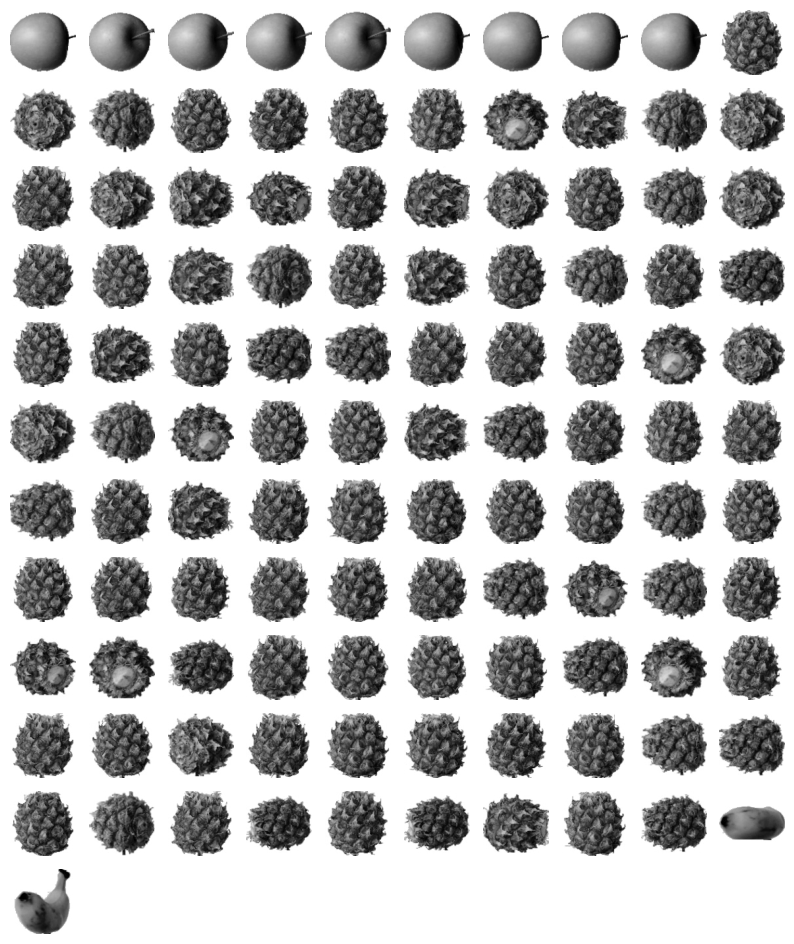

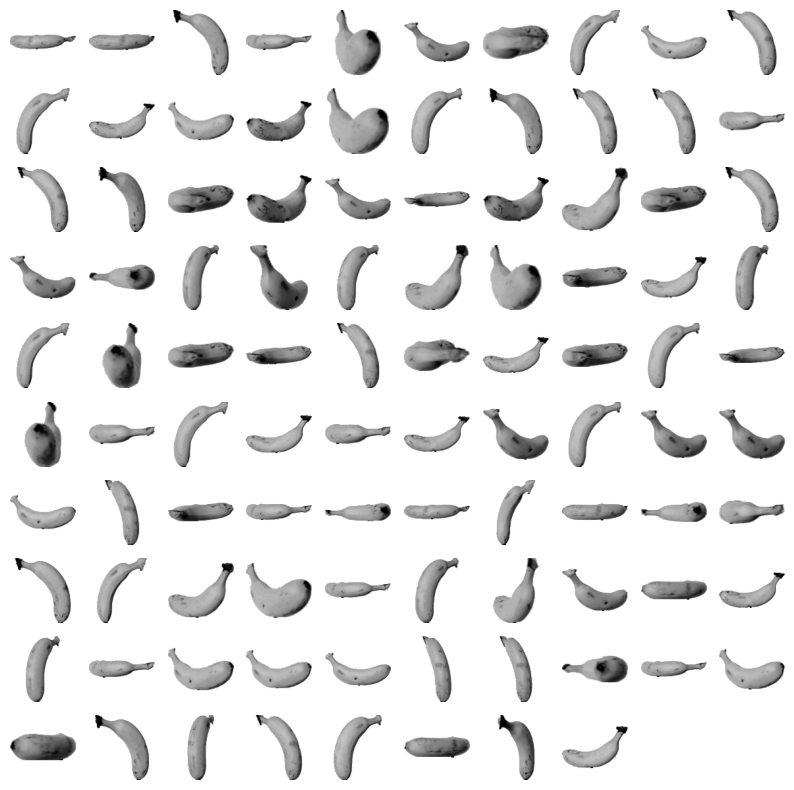

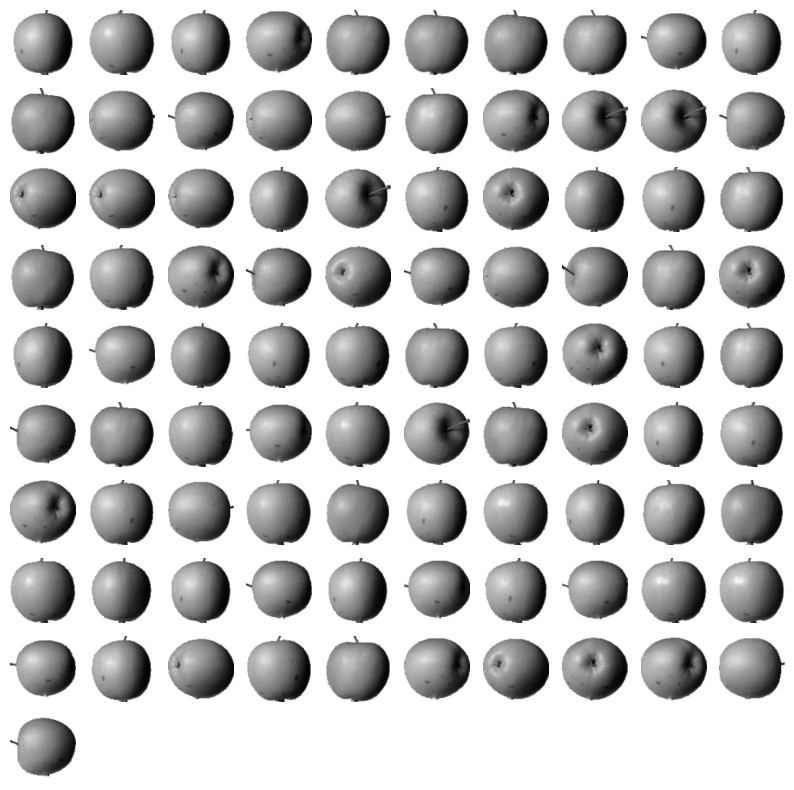

In [29]:
for label in range(0, 3) :
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

### 군집의 분포를 산점도로 시각화 하기

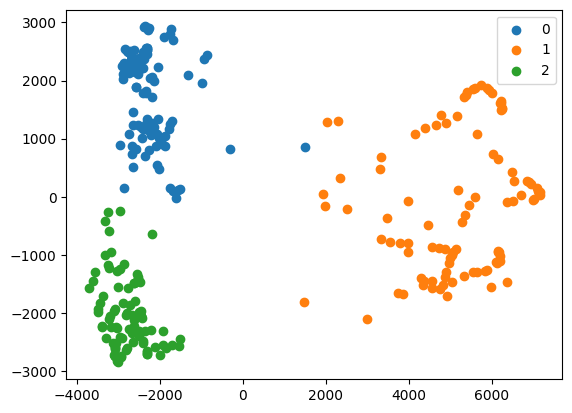

In [31]:
for label in range(0, 3) :
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])

plt.legend([0, 1, 2])
plt.show()

In [34]:
df2 = pd.DataFrame(fruits_pca)
df2

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-2778.417795,-1571.873810,-1335.337739,-1541.346812,301.773932,308.058046,-319.610183,-521.959634,-142.038306,-1400.854594,...,122.943880,146.759043,-21.167119,-52.975206,66.843302,7.869286,136.350050,13.065982,-52.295991,104.187160
1,-3078.273651,-2739.270410,-636.183371,-129.571219,-1114.908252,1031.407712,518.876691,48.693465,787.875601,504.609385,...,167.293534,-11.335008,102.945781,-7.149663,-61.790717,186.359438,11.252755,141.324387,104.619735,9.551069
2,-2620.610729,-1486.870553,-1471.337777,-1499.871053,326.194572,441.662607,-411.321083,-536.637165,-182.046161,-1401.024276,...,184.998464,142.851152,-20.028905,-90.179765,91.879056,52.903148,134.311785,75.947268,-20.889705,112.420524
3,-3113.717711,-2530.022830,805.725625,980.405007,143.577036,-831.343444,-1291.917808,723.119222,-296.119817,169.836696,...,75.799212,-78.083679,309.721033,-56.230257,-121.449804,11.444382,-90.084263,-32.809553,42.963466,24.038291
4,-2520.647051,-2330.647912,-618.237771,-139.673051,-1121.015706,1189.069434,532.489745,-698.062695,-369.337856,971.775989,...,-120.831570,78.563045,-40.525159,-196.525554,44.908720,-71.684208,38.246879,82.953641,-48.239576,-20.483674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,4955.542497,-1145.276760,-2906.832141,-834.305795,470.258423,-2568.490231,1246.732485,98.810939,529.547706,513.393416,...,-316.806142,-15.282234,126.349904,-128.062783,-207.383576,-2.548013,-91.680008,-148.418864,45.541408,-90.154949
296,5746.358051,1927.059833,-2151.824946,2857.977656,-1881.271663,440.041017,-1146.208859,-162.732673,-158.152239,-502.855414,...,-200.411266,78.588035,316.322812,-346.342273,31.952402,322.577567,139.596188,49.214931,-375.832101,1.963360
297,5182.128683,121.760516,2777.285029,-2460.411113,-1006.561428,152.181339,-115.147962,714.379620,-82.996199,-282.169728,...,115.284263,317.348112,-522.129563,-383.243874,-32.205800,4.539426,602.733278,-543.492503,130.491038,295.359820
298,3987.988006,-70.881607,-2925.552357,-840.173369,577.649435,-3470.736090,874.721237,789.769133,687.025581,1899.628842,...,1214.707771,500.940607,-459.404736,165.275221,541.768467,-76.120642,68.354173,310.801422,-125.257374,76.045295
